<a href="https://colab.research.google.com/github/thummavaishnavi/Machine-Learning/blob/main/ML_PolynomialRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Fitting a Polynomial Curve**

---



**Data visualization**

In [ ]:
import pandas
#Import the data from the .csv file
dataset = pandas.read_csv('doggy-illness.csv', delimiter="\t")

#Let's have a look at the data
dataset

,male,attended_training,age,body_fat_percentage,core_temperature,ate_at_tonys_steakhouse,needed_intensive_care,protein_content_of_last_meal
0,0,1,6.9,38,38.423169,0,0,7.66
1,0,1,5.4,32,39.015998,0,0,13.36
2,1,1,5.4,12,39.148341,0,0,12.90
3,1,0,4.8,23,39.060049,0,0,13.45
4,1,0,4.8,15,38.655439,0,0,10.53
...,...,...,...,...,...,...,...,...
93,0,0,4.5,38,37.939942,0,0,7.35
94,1,0,1.8,11,38.790426,1,1,12.18
95,0,0,6.6,20,39.489962,0,0,15.84
96,0,0,6.9,32,38.575742,1,1,9.79


**Simple Linear Regression**

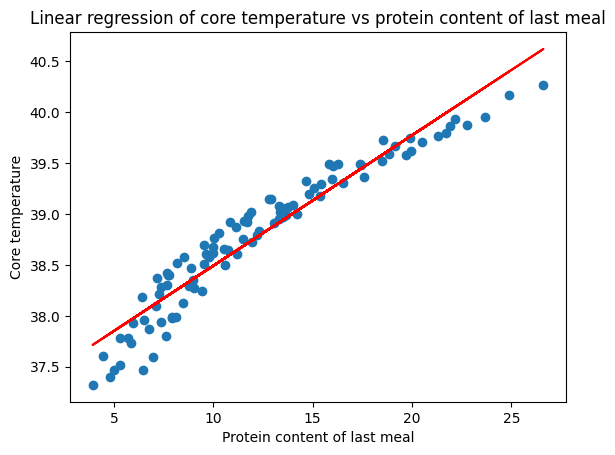

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Perform linear regression. This method takes care of
# the entire fitting procedure for us.
simple_formula = "core_temperature ~ protein_content_of_last_meal"
simple_model = smf.ols(formula = simple_formula, data = dataset).fit()

# Show a graph of the result
plt.scatter(dataset['protein_content_of_last_meal'], dataset['core_temperature'])
plt.plot(dataset['protein_content_of_last_meal'], simple_model.params[1] * dataset['protein_content_of_last_meal'] + simple_model.params[0], color='red')
plt.xlabel('Protein content of last meal')
plt.ylabel('Core temperature')
plt.title('Linear regression of core temperature vs protein content of last meal')
plt.show()

In [ ]:
print("R-squared:", simple_model.rsquared)

R-squared: 0.9155158150005704


**Simple Polynomial Regression**

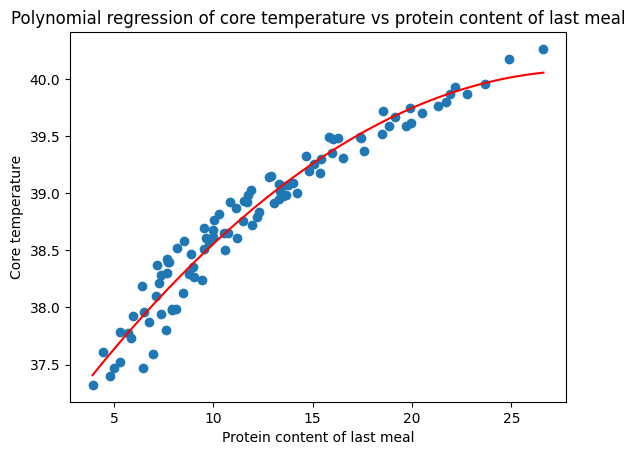

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf

# Perform polynomial regression. This method takes care of
# the entire fitting procedure for us.
polynomial_formula = "core_temperature ~ protein_content_of_last_meal + I(protein_content_of_last_meal**2)"
# y(cre_temperature)=b0 + b1X(protein_content_of_last_meal) + b2X(protein_content_of_last_meal)^2

polynomial_model = smf.ols(formula = polynomial_formula, data = dataset).fit()

# Create scatter plot
plt.scatter(dataset['protein_content_of_last_meal'], dataset['core_temperature'])

# Add polynomial trendline
x_values = np.linspace(min(dataset['protein_content_of_last_meal']), max(dataset['protein_content_of_last_meal']), 100)
y_values = polynomial_model.params[2] * x_values**2 + polynomial_model.params[1] * x_values + polynomial_model.params[0]
plt.plot(x_values, y_values, color='red')

# Customize plot
plt.xlabel('Protein content of last meal')
plt.ylabel('Core temperature')
plt.title('Polynomial regression of core temperature vs protein content of last meal')

# Show plot
plt.show()

In [ ]:
print("R-squared:", polynomial_model.rsquared)

R-squared: 0.9514426069911688


**3D-chart**

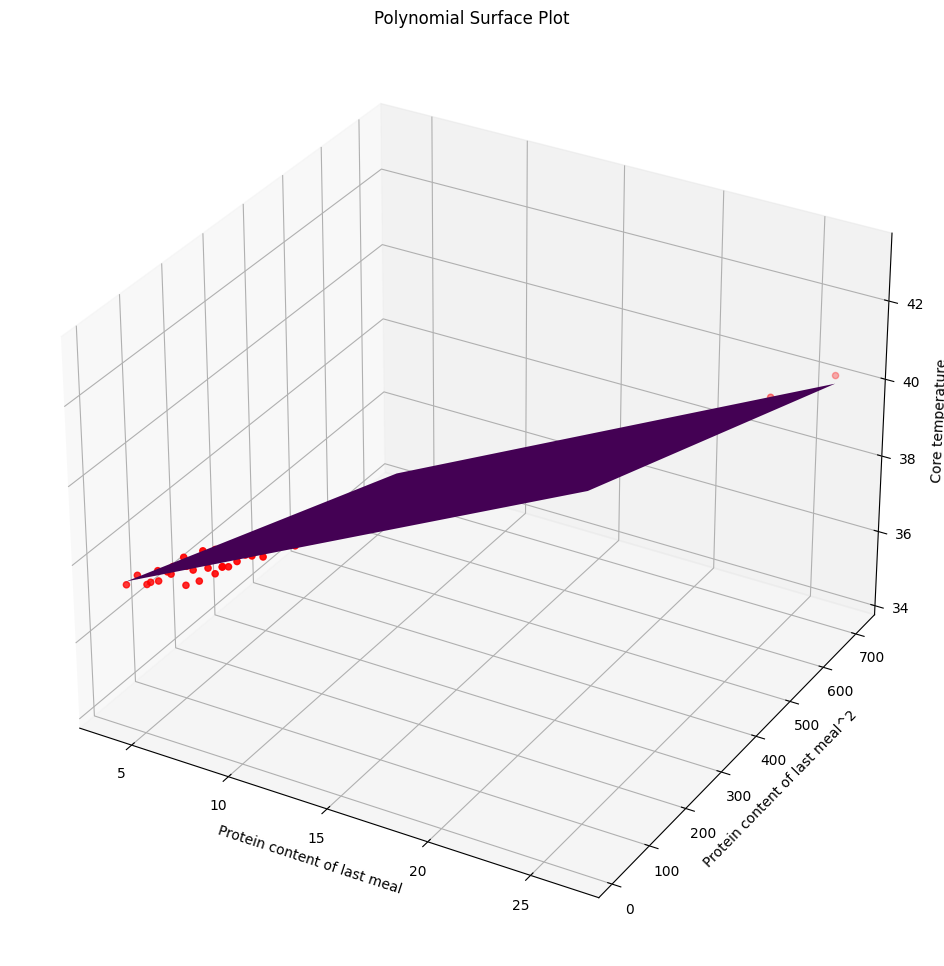

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

x = np.array([min(dataset.protein_content_of_last_meal), max(dataset.protein_content_of_last_meal)])
y = np.array([min(dataset.protein_content_of_last_meal)**2, max(dataset.protein_content_of_last_meal)**2])
X, Y = np.meshgrid(x, y)
Z = polynomial_model.params[0] + (polynomial_model.params[1] * X) + (polynomial_model.params[2] * Y) # z = bo +b1x +b2X*x

ax.plot_surface(X, Y, Z, cmap='viridis') # The cmap='viridis' argument sets the color map for the surface.
ax.scatter(dataset.protein_content_of_last_meal, dataset.protein_content_of_last_meal**2, dataset.core_temperature, c='r', marker='o')

ax.set_xlabel('Protein content of last meal')
ax.set_ylabel('Protein content of last meal^2')
ax.set_zlabel('Core temperature')
ax.set_title('Polynomial Surface Plot')

plt.show()

**Extrapolating**

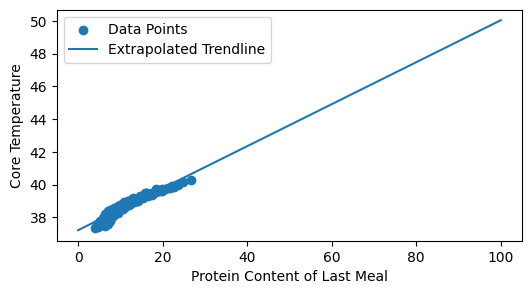

In [ ]:


# Extrapolate over the range of x = [0, 100]
x_range = np.array(range(0, 101))
# array x_range containing values from 0 to 100 (inclusive), representing the range of protein content of the last meal for extrapolation.

y_range = simple_model.params[1] * x_range + simple_model.params[0]

plt.figure(figsize=(6, 3))
plt.scatter(dataset['protein_content_of_last_meal'], dataset['core_temperature'], label='Data Points')
plt.plot(x_range, y_range, label='Extrapolated Trendline')
plt.xlabel('Protein Content of Last Meal')
plt.ylabel('Core Temperature')
plt.legend()
plt.show()